In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import PIL.Image as Image
from sklearn.cluster import KMeans

os.chdir('C:/Users/DELL/Desktop/Freelancing_DS/2/samples')

In [2]:
file_list=os.listdir(r"C:/Users/DELL/Desktop/Freelancing_DS/2/samples")

# Importing the Photos

In [3]:
Name = file_list
len_name = len(Name)

# Class performing K-means Clustering

In [4]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

In [5]:
#Using above class a data set is formed containing RGB values of the images
R1, G1, B1, R2, G2, B2 = [], [], [], [], [], []
for i in range(len_name):
    img = Name[i]
    clusters = 2
    dc = DominantColors(img, clusters) 
    colors = dc.dominantColors()
    
    R1.append(int(colors[0][0]))
    G1.append(int(colors[0][1]))
    B1.append(int(colors[0][2]))
    R2.append(int(colors[1][0]))
    G2.append(int(colors[1][1]))
    B2.append(int(colors[1][2]))

In [6]:
data = pd.DataFrame({'Name':Name,'R1':R1,'G1':G1,'B1':B1,'R2':R2,'G2':G2,'B2':B2})

In [7]:
data.shape

(243, 7)

In [8]:
data.head()

,Name,R1,G1,B1,R2,G2,B2
0,1.jpg,174,3,40,198,4,42
1,10.jpg,0,87,3,5,111,23
2,1001 edit.jpg,172,172,172,150,150,150
3,1001 original.jpg,215,203,158,203,187,143
4,1002 edit.jpg,148,147,139,164,165,157


In [9]:
data.to_csv('RGB_data.csv')

In [10]:
data = pd.read_csv("RGB_data.csv", index_col = 0)

In [16]:
#Taking input to test an image
img1 = '15.jpg'
clusters = 2
dc = DominantColors(img1, clusters) 
colors1 = dc.dominantColors()

In [17]:
colors1

array([[196, 186, 154],
       [143, 132, 102]])

# Code for filtering out images

In [18]:
b = 10
perc = 10
R1, R2, G1, G2, B1, B2 = colors1[0][0], colors1[1][0], colors1[0][1], colors1[1][1], colors1[0][2], colors1[1][2]
if ((R1 >= G1) & (R1 >= B1)):
    a, c = R1/(100/perc), R2/(100/perc)
    data1 = data[(data['R1']>=data['G1']) & (data['R1']>=data['B1'])]
    data2 = data1[((data1['R1']>(R1-a)) & (data1['R1']<(R1+a)) & (data1['G1']>(G1-b)) & (data1['G1']<(G1+b)) & (data1['B1']>(B1-b)) & (data1['B1']<(B1+b)))
                  |((data1['R2']>(R2-c)) & (data1['R2']<(R2+c)) & (data1['G2']>(G2-b)) & (data1['G2']<(G2+b)) & (data1['B2']>(B2-b)) & (data1['B2']<(B2+b)))
                  |((data1['R1']>(R2-c)) & (data1['R1']<(R2+c)) & (data1['G1']>(G2-b)) & (data1['G1']<(G2+b)) & (data1['B1']>(B2-b)) & (data1['B1']<(B2+b)))
                  |((data1['R2']>(R1-a)) & (data1['R2']<(R1+a)) & (data1['G2']>(G1-b)) & (data1['G2']<(G1+b)) & (data1['B2']>(B1-b)) & (data1['B2']<(B1+b)))]
    
elif (G1 >= R1 & G1 >= B1):
    a, c = G1/(100/perc), G2/(100/perc)
    data1 = data[(data['G1']>=data['R1']) & (data['G1']>=data['B1'])]
    data2 = data1[((data1['R1']>(R1-b)) & (data1['R1']<(R1+b)) & (data1['G1']>(G1-a)) & (data1['G1']<(G1+a)) & (data1['B1']>(B1-b)) & (data1['B1']<(B1+b)))
                  |((data1['R2']>(R2-b)) & (data1['R2']<(R2+b)) & (data1['G2']>(G2-c)) & (data1['G2']<(G2+c)) & (data1['B2']>(B2-b)) & (data1['B2']<(B2+b)))
                  |((data1['R1']>(R2-b)) & (data1['R1']<(R2+b)) & (data1['G1']>(G2-c)) & (data1['G1']<(G2+c)) & (data1['B1']>(B2-b)) & (data1['B1']<(B2+b)))
                  |((data1['R2']>(R1-b)) & (data1['R2']<(R1+b)) & (data1['G2']>(G1-a)) & (data1['G2']<(G1+a)) & (data1['B2']>(B1-b)) & (data1['B2']<(B1+b)))]
    
else:
    a, c = colors1[0][2]/(100/perc), colors1[1][2]/(100/perc)
    data1 = data[(data['B1']>=data['R1']) & (data['B1']>=data['G1'])]
    data2 = data1[((data1['R1']>(R1-b)) & (data1['R1']<(R1+b)) & (data1['G1']>(G1-b)) & (data1['G1']<(G1+b)) & (data1['B1']>(B1-a)) & (data1['B1']<(B1+a)))
                  |((data1['R2']>(R2-b)) & (data1['R2']<(R2+b)) & (data1['G2']>(G2-b)) & (data1['G2']<(G2+b)) & (data1['B2']>(B2-c)) & (data1['B2']<(B2+c)))
                  |((data1['R1']>(R2-b)) & (data1['R1']<(R2+b)) & (data1['G1']>(G2-b)) & (data1['G1']<(G2+b)) & (data1['B1']>(B2-c)) & (data1['B1']<(B2+c)))
                  |((data1['R2']>(R1-b)) & (data1['R2']<(R1+b)) & (data1['G2']>(G1-b)) & (data1['G2']<(G1+b)) & (data1['B2']>(B1-a)) & (data1['B2']<(B1+a)))]
    

In [19]:
data2

,Name,R1,G1,B1,R2,G2,B2
42,13.jpg,96,90,77,131,127,111
44,15.jpg,196,186,154,143,132,102
60,2005 orignal.jpg,164,152,128,183,179,163
63,2007 edit.jpg,167,155,132,150,135,110
82,2016 orignal.jpg,188,156,116,213,189,161
112,2033 orignal.jpg,188,167,136,200,187,161
122,2040 orignal.jpg,189,180,160,172,157,133
126,2042 orignal.jpg,203,191,162,184,169,141
130,2044 orignal.jpg,149,125,96,176,154,125
138,2049 orignal.jpg,172,163,144,137,125,105


In [20]:
data2.shape

(18, 7)

In [21]:
nam = data2.Name.tolist()

# SIFT Technology to match pattern

In [24]:
match = []
img2 = cv2.imread(img1,cv2.COLOR_BGR2RGB)
for i in range(len(nam)):
    img3 = cv2.imread(nam[i],cv2.COLOR_BGR2RGB)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(img3,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
    if(keypoints_1 == 0 or keypoints_2 ==0 or descriptors_1 is None or descriptors_2 is None):
        match.append(90)
        continue
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)
    matching_perc = (2*len(matches))/(len(keypoints_1)+len(keypoints_2))
    match.append(matching_perc*100)
   

In [25]:
match

[0.8900190718372537,
 100.0,
 14.173228346456693,
 34.04255319148936,
 48.4375,
 10.909090909090908,
 31.272727272727273,
 14.112903225806454,
 9.876543209876543,
 2.5848142164781907,
 5.839416058394161,
 15.139442231075698,
 22.22222222222222,
 21.92513368983957,
 17.647058823529413,
 2.1039209435766657,
 3.4229828850855744,
 1.0191846522781776]

In [26]:
length = len(nam)

In [27]:
new_list = []
match_perc = 20
for i in range(length):
    if(match[i]>match_perc):
        new_list.append(nam[i])

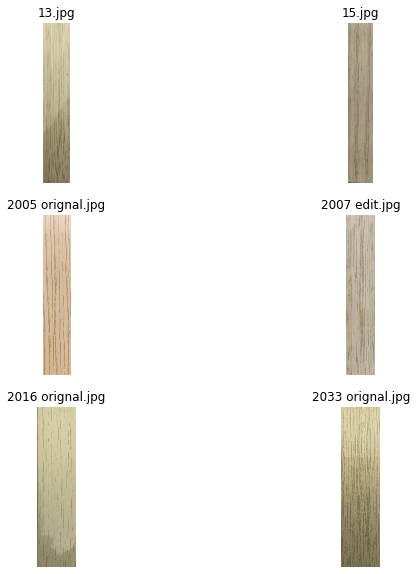

In [29]:
#Printing output images

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 70))
rows = 20
columns = 2
if(len(new_list)>0):
    for i in range(len(new_list)):
        fig.add_subplot(rows, columns, i+1)
        img2 = cv2.imread(new_list[i])
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(nam[i])
else:
    for i in range(len(nam)):
        fig.add_subplot(rows, columns, i+1)
        img2 = cv2.imread(nam[i])
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(nam[i])
